# ***Connect Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# ***Import Library***

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import re
import string
import math
!pip install contractions
import contractions
from bs4 import BeautifulSoup
import requests, json
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 11.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
import time

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
from collections import Counter
from nltk.probability import FreqDist

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC)
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler
from imblearn.combine import SMOTETomek, SMOTEENN

# ***Dataset***

In [ ]:
df_train = pd.read_csv("/content/drive/Shareddrives/NGHIÊN CỨU KHOA HỌC/Code/DATASET_REAL_3.csv", encoding='unicode-escape')

# ***Handing dataset***

In [ ]:
df_train = df_train.dropna() #Loại bỏ giá trị bị thiếu

In [ ]:
for i in df_train.columns:
    if (df_train[i].isna().sum()>=0):
        print("Feature",i,"has",df_train[i].isna().sum(),"missing values.")  
        print('---'*20)

Feature content has 0 missing values.
------------------------------------------------------------
Feature label has 0 missing values.
------------------------------------------------------------


In [ ]:
df_train.duplicated().sum() # Kiểm tra giá trị trùng lặp

1

In [ ]:
df_train = df_train.drop_duplicates(keep='first') # Xóa giá trị trùng lặp

In [ ]:
df_train.info() # Kiểm tra dữ liệu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5730 entries, 0 to 5730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5730 non-null   object
 1   label    5730 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 134.3+ KB


# ***Preprocessing***

In [ ]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
def slang_abbrev(string):
    a = []
    for i in (string.lower()).split(): 
      if i in abbreviations.keys():
        a.append(abbreviations[i])
      else:
        a.append(i)
    return " ".join(a)

def preprocess(text, remove_digits=False):
    text = contractions.fix(text)
    text = text.lower()
    text = text.strip()
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^azA-Z\s]'
    text = re.sub(pattern, '', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub(r'[\r|\n|\r\n]+', '\n', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

def stopword(string):
    stop_word = stopwords.words('english')
    stop_word.extend(["dear","hi","please","subject"])
    a = [i for i in string.split() if i not in stop_word]
    return " ".join(a)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(string):
    wl = WordNetLemmatizer()
    word_pos_tags = nltk.pos_tag(word_tokenize(string))
    a = [wl.lemmatize(tag[0], pos=get_wordnet_pos(tag[1])) for idx, tag in
         enumerate(word_pos_tags)]
    return " ".join(a)

def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(slang_abbrev(string))))

In [ ]:
df_train['clean_text'] = df_train['content'].apply(lambda x: finalpreprocess(x))

In [ ]:
df_train

,content,label,clean_text
0,"Thank you for the information you support, my side will consult and prepare. If you have any pro...",0,thank information support side consult prepare problem talk nice day
1,Subject: cruise 3 nts mexico only $ 197 ! - - tremendous savings inside\r\ntravelocitylast minut...,3,cruise nt mexico dollar tremendous saving inside travelocitylast minute air w car rental expedia...
2,"Hi,\n\nIf I Give You 15% Discount, We will make a loss.\n\nNo Meaning To Do This Order, We Can S...",1,give discount make loss meaning order support discount thank
3,We would like send you Schedule for this shipment as below. \nPls delivery cargo for DHL. Thanks...,1,would like send schedule shipment pls delivery cargo dhl thanks courier pickup schedule follow d...
4,"Subject: re : your code # 5 g 6878\r\nhi again ,\r\ni sent an email 2 days ago and i want to con...",3,code g send email day ago want confirm everything read info let know question accept mortgage ap...
...,...,...,...
5726,"Dear Mr Vu, \n\nMOQ for item 3.1 is 100 mtrs for new cables production, please issue draft PO ba...",1,mister vu moq item mtrs new cable production issue draft po base mtrs thank
5727,"Dear Anh Kha, \n\nGood morning! \nItem 38: Ball Valve 1/2"" NPTF 10000psi, for Ball Valve 1/2"" NP...",2,anh kha good morning item ball valve nptf psi ball valve npt fujikins ball valve nptf withstand ...
5728,"Dear Mr. Okay,\nI need support for the following product quotation:\n10 PC Socket in Galley 13am...",2,mr okay need support follow product quotation pc socket galley amp v hz ip b c clipsal pc switch...
5729,"Mark, I heard earlier today that the resolution of this matter has been to move confirmation/doc...",1,mark heard earlier today resolution matter move confirmationdocumentation calgary leave contract...


# ***EDA text classification***



<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='label'>

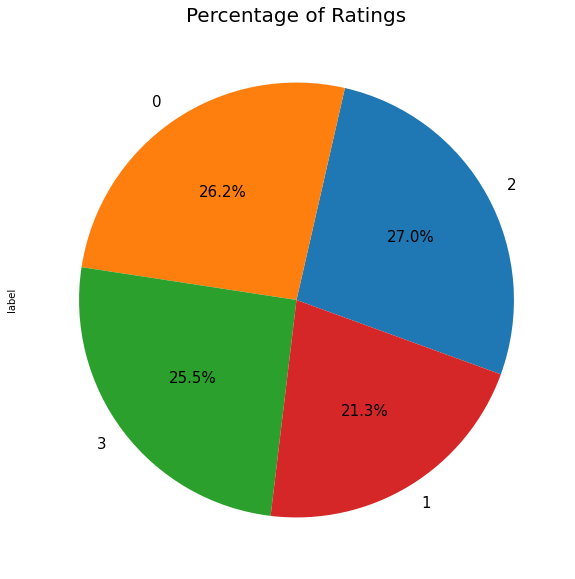

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
# df_train.label.value_counts().plot(kind='pie', labels=['Sales', 'Customer Care', 'Spam', 'External Relaionship'],
#                               wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
#                               textprops={'fontsize': 15})
df_train.label.value_counts().plot(kind='pie',
                              autopct='%0.01f%%', startangle= -20, 
                              textprops={'fontsize': 15})

In [ ]:
group_by = df_train.groupby('label')['clean_text'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[3]
words0 = list(zip(*group_by_0))[0]

In [ ]:
group_by

label
0    [(order, 1071), (service, 633), (good, 614), (product, 504), (price, 477), (delivery, 466), (sit...
1    [(send, 667), (u, 507), (po, 458), (thank, 348), (good, 334), (order, 316), (company, 316), (che...
2    [(price, 890), (quote, 662), (quotation, 652), (u, 613), (thank, 612), (send, 605), (pc, 524), (...
3    [(dollar, 1821), (com, 989), (http, 981), (company, 921), (price, 726), (e, 643), (get, 621), (w...
Name: clean_text, dtype: object

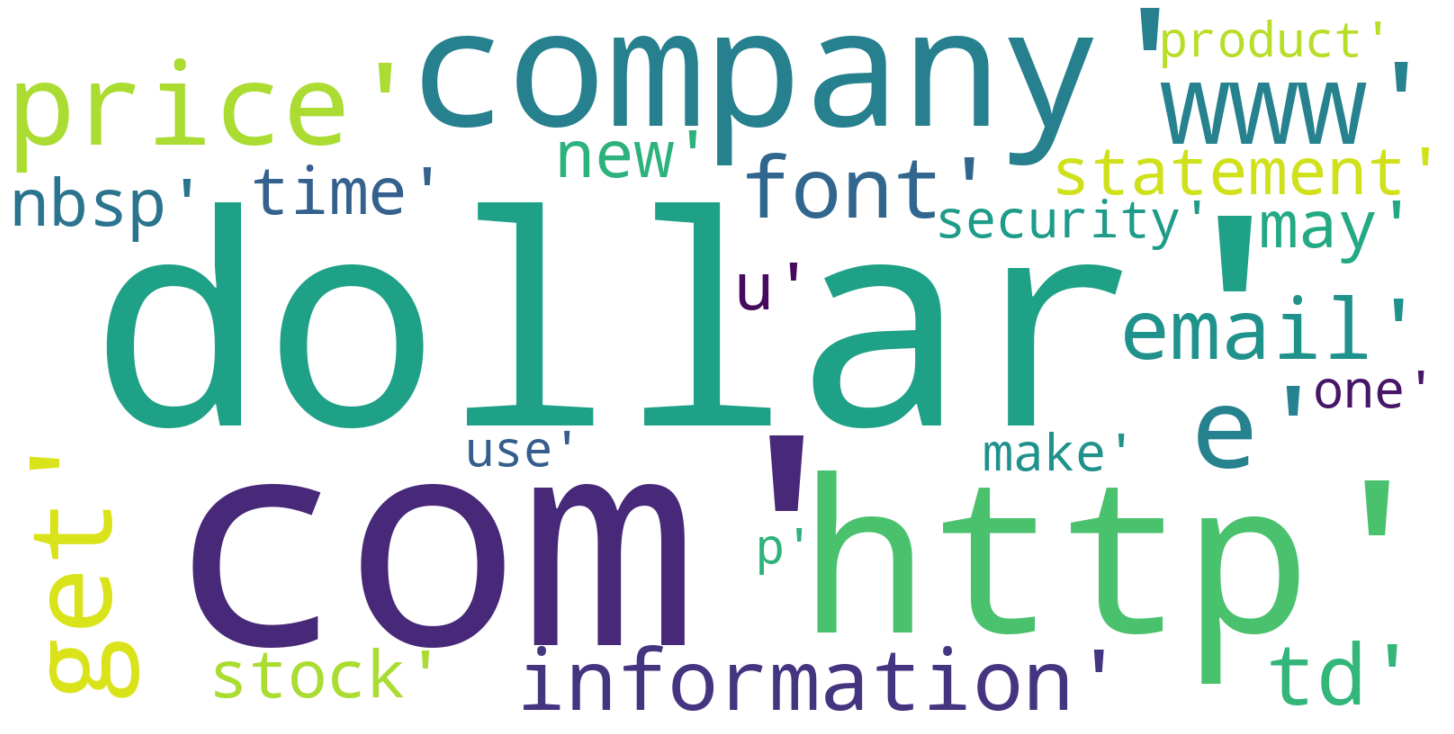

In [ ]:
mostcommon = FreqDist(words0).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
# plt.title('Top 100 Most Common Words', fontsize=80)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=5000)
tfidf = tfidf_vectorizer.fit_transform(df_train['clean_text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,aa,ab,abazis,abb,abc,abdominal,abdv,abet,abhorred,abiiity,...,zenith,zero,zimbabwe,zinc,zone,zonedubai,zu,zyban,zz,zzc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ***NLP***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                    df_train["clean_text"], 
                                    df_train["label"], 
                                    test_size=0.2, shuffle=True)
classifier = []

In [ ]:
def tf(data):
    tfidf = TfidfVectorizer(use_idf=True, max_features=5000)
    emb = tfidf.fit_transform(data)
    return emb, tfidf
X_train_vectors_tfidf, tfidf = tf(X_train)
X_test_vectors_tfidf = tfidf.transform(X_test)

In [ ]:
# Before Oversampling
print('Target before oversampling:')
print(pd.Series(y_train).value_counts())

Target before oversampling:
2    1225
0    1200
3    1174
1     985
Name: label, dtype: int64


In [ ]:
smtom = SMOTETomek(random_state=130)
X_train_vectors_tfidf, y_train = smtom.fit_resample(X_train_vectors_tfidf, y_train)
X_test_vectors_tfidf, y_test = smtom.fit_resample(X_test_vectors_tfidf, y_test)

In [ ]:
# Setelah Oversampling
print('Target after oversampling:')
print(pd.Series(y_train).value_counts())

Target after oversampling:
3    1225
0    1184
1    1177
2    1174
Name: label, dtype: int64


In [ ]:
clfs = [SGDClassifier(), 
        LinearSVC(),
        GradientBoostingClassifier(),
        ExtraTreesClassifier()]

In [ ]:
classify = []
for clf in clfs:
  clf = OneVsRestClassifier(clf)
  clf.fit(X_train_vectors_tfidf,y_train)
  predictions = clf.predict(X_test_vectors_tfidf)
  print("Score: ", accuracy_score(predictions, y_test)*100)
  classify.append(accuracy_score(predictions, y_test))
classifier.append(classify)

Score:  83.12401883830455
Score:  83.12401883830455
Score:  79.3563579277865
Score:  84.37990580847725


In [ ]:
classify = []
for clf in clfs:
  clf = OneVsOneClassifier(clf)
  clf.fit(X_train_vectors_tfidf,y_train)
  predictions = clf.predict(X_test_vectors_tfidf)
  print("Score: ", accuracy_score(predictions, y_test)*100)
  classify.append(accuracy_score(predictions, y_test))
classifier.append(classify)

Score:  82.6530612244898
Score:  82.73155416012558
Score:  79.12087912087912
Score:  82.73155416012558


# ***Test***

In [ ]:
def class_wise_kappa(true, pred, n_classes=None, ignore_zero=True):
    from sklearn.metrics import cohen_kappa_score
    if n_classes is None:
        classes = np.unique(true)
    else:
        classes = np.arange(max(2, n_classes))
    # Ignore background class?
    if ignore_zero:
        classes = classes[np.where(classes != 0)]

    # Calculate kappa for all targets
    kappa_scores = np.empty(shape=classes.shape, dtype=np.float32)
    kappa_scores.fill(np.nan)
    for idx, _class in enumerate(classes):
        s1 = true == _class
        s2 = pred == _class

        if np.any(s1) or np.any(s2):
            kappa_scores[idx] = cohen_kappa_score(s1, s2)
    return sum(kappa_scores)/len(kappa_scores) 

In [ ]:
kf = KFold(n_splits=10, random_state=3, shuffle=True)
for train_index, test_index in kf.split(df_train['clean_text']):    
    X_train, X_test = df_train['clean_text'].iloc[train_index], df_train['clean_text'].iloc[test_index]
    y_train, y_test = df_train['label'].iloc[train_index], df_train['label'].iloc[test_index]

In [ ]:
X_train_vectors_tfidf, tfidf = tf(X_train)
X_test_vectors_tfidf = tfidf.transform(X_test)

In [ ]:
smtom = SMOTETomek(random_state=130)
X_train_vectors_tfidf, y_train = smtom.fit_resample(X_train_vectors_tfidf, y_train)
X_test_vectors_tfidf, y_test = smtom.fit_resample(X_test_vectors_tfidf, y_test)

In [ ]:
result = []
for multi_label in (OneVsOneClassifier, OneVsRestClassifier):
  for model in clfs:
    #train
    clf = multi_label(model)
    t = time.time()
    clf.fit(X_train_vectors_tfidf,y_train)
    train_time = time.time() - t
    #predict
    t = time.time()
    predictions = clf.predict(X_test_vectors_tfidf)
    pred_time = time.time() - t
    result.append([type(model).__name__,
                  type(clf).__name__,
                  f1_score(predictions, y_test, average='macro'),
                  class_wise_kappa(y_test, predictions),
                  train_time,
                  pred_time])

In [ ]:
show_result = pd.DataFrame(data = result, columns = ['Model', 'Multi-Label', 'F1-Score', 'Kappa', 'Training time', 'Prediction time'])

In [ ]:
show_result

,Model,Multi-Label,F1-Score,Kappa,Training time,Prediction time
0,SGDClassifier,OneVsOneClassifier,0.837439,0.780895,0.041901,0.001906
1,LinearSVC,OneVsOneClassifier,0.846160,0.791810,0.054816,0.001930
2,GradientBoostingClassifier,OneVsOneClassifier,0.796613,0.737219,15.129929,0.014036
3,ExtraTreesClassifier,OneVsOneClassifier,0.818145,0.761336,12.987183,0.428822
4,SGDClassifier,OneVsRestClassifier,0.840972,0.788018,0.059836,0.001056
5,LinearSVC,OneVsRestClassifier,0.842792,0.789881,0.097057,0.000964
6,GradientBoostingClassifier,OneVsRestClassifier,0.804879,0.755707,20.207058,0.004457
7,ExtraTreesClassifier,OneVsRestClassifier,0.825985,0.768786,19.482266,0.156560


In [ ]:
show_result_0 = show_result.groupby("Model")

In [ ]:
ovo = show_result_0.first()
ovr = show_result_0.last()

In [ ]:
list(show_result_0.groups.keys())

['ExtraTreesClassifier',
 'GradientBoostingClassifier',
 'LinearSVC',
 'SGDClassifier']

In [ ]:
'{:.3f}'.format(ovo['F1-Score'][0])

'0.818'

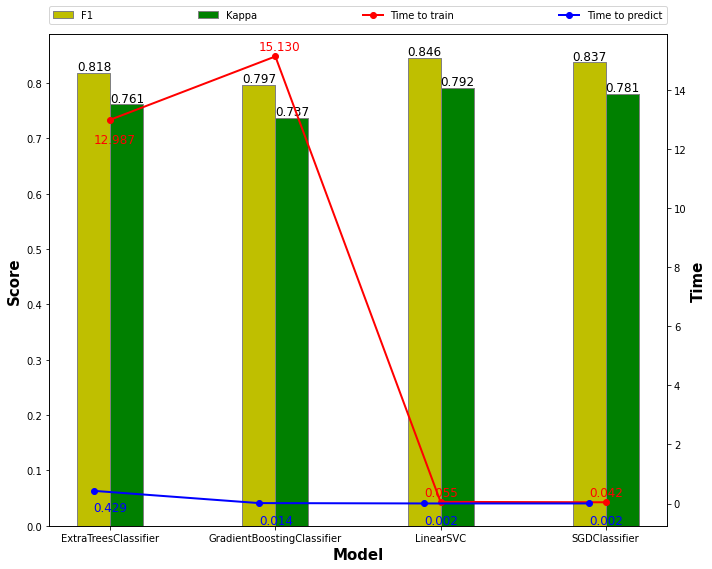

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,8))
 
br1 = np.arange(len(ovo['F1-Score']))
br2 = [x + 0.2 for x in br1]
br3 = [x + 0.1 for x in br1]
score_1 = ax1.bar(br1, ovo['F1-Score'], color ='y', width = 0.2,
        edgecolor ='grey', label ='F1')
score_2 = ax1.bar(br2, ovo['Kappa'], color ='g', width = 0.2,
        edgecolor ='grey', label ='Kappa')
for index in range(len(ovo['F1-Score'])):
  ax1.text(index-0.1, ovo['F1-Score'][index]+0.005, '{:.3f}'.format(ovo['F1-Score'][index]), size=12, color='k')
for index in range(len(ovo['Kappa'])):
  ax1.text(index+0.1, ovo['Kappa'][index]+0.005, '{:.3f}'.format(ovo['Kappa'][index]), size=12, color='k')
ax1.tick_params(axis='y', labelcolor='k')

ax2 = ax1.twinx()
time_1 = ax2.plot([r + 0.1 for r in range(len(ovo['F1-Score']))],ovo['Training time'],color='r',marker='o',linewidth = 2,label = 'Time to train')
time_2 = ax2.plot(list(show_result_0.groups.keys()),ovo['Prediction time'],color='b',marker='o',linewidth = 2,label = 'Time to predict')
ax2.text(list(show_result_0.groups.keys())[0], ovo['Training time'][0]-0.8, '{:.3f}'.format(ovo['Training time'][0]), size=12, color='r')
for index in range(1,len(ovo['Training time'])):
  ax2.text(list(show_result_0.groups.keys())[index], ovo['Training time'][index]+0.2, '{:.3f}'.format(ovo['Training time'][index]), size=12, color='r')
for index in range(len(ovo['Prediction time'])):
  ax2.text(list(show_result_0.groups.keys())[index], ovo['Prediction time'][index]-(0.7), '{:.3f}'.format(ovo['Prediction time'][index]), size=12, color='b')
ax2.tick_params(axis='y', labelcolor='k')

ax1.set_xlabel('Model', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('Score', fontweight ='bold', fontsize = 15)
ax2.set_ylabel('Time', fontweight ='bold', fontsize = 15)
ax1.set_xticks([r + 0.1 for r in range(len(ovo['F1-Score']))],
        list(show_result_0.groups.keys()))

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=4, mode="expand", borderaxespad=0.)

fig.tight_layout()
plt.show()

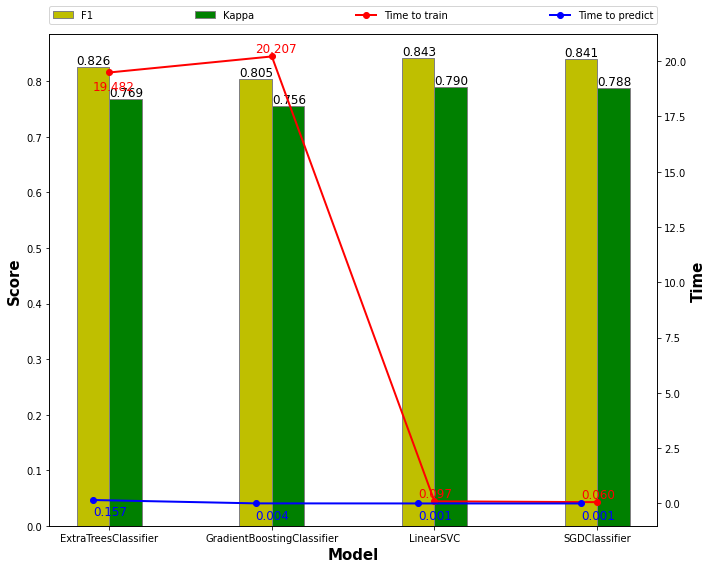

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,8))
 
br1 = np.arange(len(ovr['F1-Score']))
br2 = [x + 0.2 for x in br1]
br3 = [x + 0.1 for x in br1]
score_1 = ax1.bar(br1, ovr['F1-Score'], color ='y', width = 0.2,
        edgecolor ='grey', label ='F1')
score_2 = ax1.bar(br2, ovr['Kappa'], color ='g', width = 0.2,
        edgecolor ='grey', label ='Kappa')
for index in range(len(ovr['F1-Score'])):
  ax1.text(index-0.1, ovr['F1-Score'][index]+0.005, '{:.3f}'.format(ovr['F1-Score'][index]), size=12, color='k')
for index in range(len(ovr['Kappa'])):
  ax1.text(index+0.1, ovr['Kappa'][index]+0.005, '{:.3f}'.format(ovr['Kappa'][index]), size=12, color='k')
ax1.tick_params(axis='y', labelcolor='k')

ax2 = ax1.twinx()
time_1 = ax2.plot([r + 0.1 for r in range(len(ovr['F1-Score']))],ovr['Training time'],color='r',marker='o',linewidth = 2,label = 'Time to train')
time_2 = ax2.plot(list(show_result_0.groups.keys()),ovr['Prediction time'],color='b',marker='o',linewidth = 2,label = 'Time to predict')
ax2.text(list(show_result_0.groups.keys())[0], ovr['Training time'][0]-0.8, '{:.3f}'.format(ovr['Training time'][0]), size=12, color='r')
for index in range(1,len(ovr['Training time'])):
  ax2.text(list(show_result_0.groups.keys())[index], ovr['Training time'][index]+0.2, '{:.3f}'.format(ovr['Training time'][index]), size=12, color='r')
for index in range(len(ovr['Prediction time'])):
  ax2.text(list(show_result_0.groups.keys())[index], ovr['Prediction time'][index]-(0.7), '{:.3f}'.format(ovr['Prediction time'][index]), size=12, color='b')
ax2.tick_params(axis='y', labelcolor='k')

ax1.set_xlabel('Model', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('Score', fontweight ='bold', fontsize = 15)
ax2.set_ylabel('Time', fontweight ='bold', fontsize = 15)
ax1.set_xticks([r + 0.1 for r in range(len(ovr['F1-Score']))],
        list(show_result_0.groups.keys()))

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=4, mode="expand", borderaxespad=0.)

fig.tight_layout()
plt.show()

# ***Test real***

In [ ]:
model_rpa = OneVsOneClassifier(LinearSVC())
model_rpa = CalibratedClassifierCV(model_rpa) 

In [ ]:
sample = """Dear Mr. Kha, 

I thank you for your request, the parameters described KH describing both Level Gauge and Level Transmitter, but the product name requires quotation just to level Transmitter, so ask me to check with KH to help me is KH. Need to greet the whole set or only the transmitter level? 

Thank you and have a nice working day!
"""

In [ ]:
X_train_tfidf, tfidf = tf(df_train['clean_text'])

In [ ]:
smtom = SMOTETomek(random_state=130)
X_train_tfidf, y_train_smtom = smtom.fit_resample(X_train_tfidf, df_train['label'])

In [ ]:
sample = finalpreprocess(sample)
test = sample
X_vector = tfidf.transform([test])
model_rpa.fit(X_train_tfidf,y_train_smtom)
y_predict = model_rpa.predict(X_vector)
y_prob = model_rpa.predict_proba(X_vector)

In [ ]:
y_predict[0]

2

In [ ]:
y_prob
# [1 / (1 + exp(-x)) ] 

array([[2.02956703e-01, 1.47314873e-02, 7.82311448e-01, 3.61780706e-07]])

In [ ]:
for i in range(len(y_prob[0])):
  x = y_prob[0][i]
  y_prob[0][i] = 1 / (1 + math.exp(-x))

In [ ]:
y_prob

array([[0.55056572, 0.50368281, 0.68617807, 0.50000009]])

In [ ]:
max(y_prob[0])

0.6861780699462534

# ***Test 1000 row***

In [ ]:
df_test = pd.read_csv("/content/drive/Shareddrives/NGHIÊN CỨU KHOA HỌC/Code/DATASET_TEST.csv", encoding='unicode-escape')

In [ ]:
model_rpa = OneVsOneClassifier(LinearSVC())
model_rpa = CalibratedClassifierCV(model_rpa)
X_train_tfidf, tfidf = tf(df_train['clean_text'])
X_train_tfidf, y_train_smtom = smtom.fit_resample(X_train_tfidf, df_train['label'])
model_rpa.fit(X_train_tfidf,y_train_smtom)

CalibratedClassifierCV(estimator=OneVsOneClassifier(estimator=LinearSVC()))

In [ ]:
def test(content):
  content = finalpreprocess(content)
  X_test = content
  X_vector = tfidf.transform([X_test])
  # y_predict = model_rpa.predict(X_vector)
  y_prob = model_rpa.predict_proba(X_vector)
  return max(y_prob[0])

In [ ]:
df_test['label'] = df_test['content'].apply(lambda x: test(x))

In [ ]:
df_test

,content,label
0,"Thank you for the information you support, my side will consult and prepare. If you have any pro...",0.803124
1,Subject: cruise 3 nts mexico only $ 197 ! - - tremendous savings inside\r\ntravelocitylast minut...,0.883120
2,"Hi,\n\nIf I Give You 15% Discount, We will make a loss.\n\nNo Meaning To Do This Order, We Can S...",0.535930
3,We would like send you Schedule for this shipment as below. \nPls delivery cargo for DHL. Thanks...,0.798030
4,"Subject: re : your code # 5 g 6878\r\nhi again ,\r\ni sent an email 2 days ago and i want to con...",0.893077
...,...,...
995,"Subject: feel too old\r\ngo on , click and help your father ' s pain go away\r\nhttp : / / onlin...",0.899079
996,"People, do not buy from these cheaters, junk, and bad guys! !\nDo not be fooled by the ""appetite...",0.899124
997,"Dear Ms. Dung, \nHe sent more technical parts like attached files. Please check and quote soon.",0.790916
998,Subject: looking for ci _ . a . _ lis ? we ` re the best source .\r\nsalut !\r\nsick of feeling ...,0.831412


In [ ]:
print(np.mean(df_test['label']))
print(st.mode(df_test['label'])[0][0])
print(np.median(df_test['label']))
print(np.quantile(df_test['label'], 0.25))
print(np.quantile(df_test['label'], 0.75))

0.8264915197310361
0.8319721298710208
0.8396249502546542
0.7822389532064501
0.8893864875691797


<ipython-input-58-cf4857cf2df3>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(st.mode(df_test['label'])[0][0])


<ipython-input-59-2e73f0854285>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  plt.axhline(st.mode(df_test['label'])[0][0], color='b', linestyle='dashed', linewidth=2)
<ipython-input-59-2e73f0854285>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  plt.text(st.

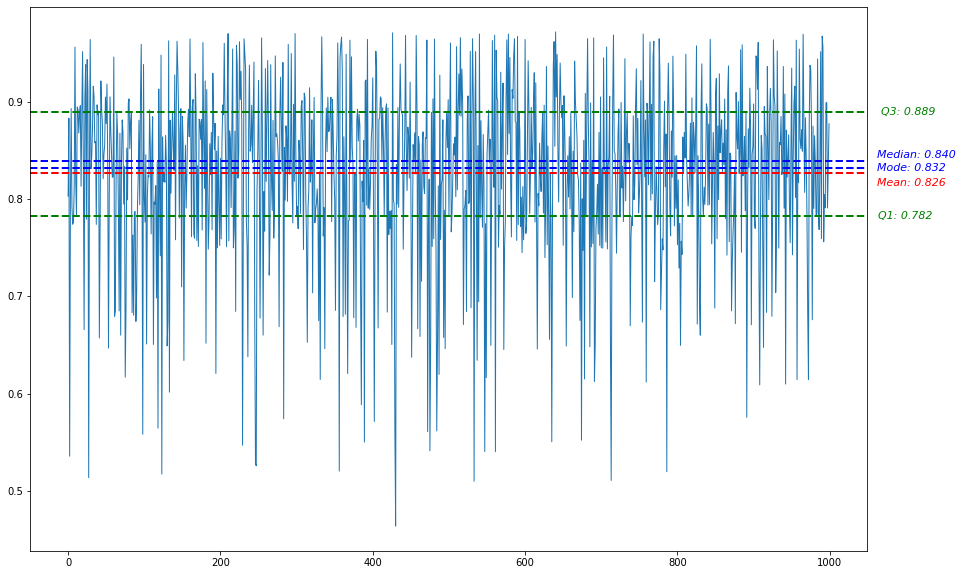

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df_test['label'], linewidth='1')
plt.axhline(df_test['label'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axhline(st.mode(df_test['label'])[0][0], color='b', linestyle='dashed', linewidth=2)
plt.axhline(np.median(df_test['label']), color='b', linestyle='dashed', linewidth=2)
plt.axhline(np.quantile(df_test['label'], 0.25), color='g', linestyle='dashed', linewidth=2)
plt.axhline(np.quantile(df_test['label'], 0.75), color='g', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(df_test['label'].mean()*(1285), max_ylim*0.816, 'Mean: {:.3f}'.format(df_test['label'].mean()), fontsize=11,style='oblique',color='r')
plt.text(st.mode(df_test['label'])[0][0]*(1277), max_ylim*0.831, 'Mode: {:.3f}'.format(st.mode(df_test['label'])[0][0]), fontsize=11, style='oblique',color='b')
plt.text(np.median(df_test['label'])*(1265), max_ylim*0.845, 'Median: {:.3f}'.format(np.median(df_test['label'])), fontsize=11, style='oblique',color='b')
plt.text(np.quantile(df_test['label'], 0.25)*(1360), max_ylim*0.782, 'Q1: {:.3f}'.format(np.quantile(df_test['label'], 0.25)), fontsize=11, style='oblique',color='g')
plt.text(np.quantile(df_test['label'], 0.75)*(1200), max_ylim*0.889, 'Q3: {:.3f}'.format(np.quantile(df_test['label'], 0.75)), fontsize=11, style='oblique',color='g')
plt.show()

# ***Compare with multi-label***

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/NGHIÊN CỨU KHOA HỌC/Code/DATASET_REAL_4.csv", encoding='unicode-escape')

In [ ]:
df['clean_text'] = df['content'].apply(lambda x: finalpreprocess(x))

In [ ]:
df

,content,type,label,clean_text
0,"Thank you for the information you support, my side will consult and prepare. If you have any pro...",0,0,thank information support side consult prepare problem talk nice day
1,Subject: cruise 3 nts mexico only $ 197 ! - - tremendous savings inside\r\ntravelocitylast minut...,1,0,cruise nt mexico dollar tremendous saving inside travelocitylast minute air w car rental expedia...
2,"Hi,\n\nIf I Give You 15% Discount, We will make a loss.\n\nNo Meaning To Do This Order, We Can S...",0,1,give discount make loss meaning order support discount thank
3,We would like send you Schedule for this shipment as below. \nPls delivery cargo for DHL. Thanks...,0,1,would like send schedule shipment pls delivery cargo dhl thanks courier pickup schedule follow d...
4,"Subject: re : your code # 5 g 6878\r\nhi again ,\r\ni sent an email 2 days ago and i want to con...",1,0,code g send email day ago want confirm everything read info let know question accept mortgage ap...
...,...,...,...,...
5726,"Dear Mr Vu, \n\nMOQ for item 3.1 is 100 mtrs for new cables production, please issue draft PO ba...",0,1,mister vu moq item mtrs new cable production issue draft po base mtrs thank
5727,"Dear Anh Kha, \n\nGood morning! \nItem 38: Ball Valve 1/2"" NPTF 10000psi, for Ball Valve 1/2"" NP...",0,2,anh kha good morning item ball valve nptf psi ball valve npt fujikins ball valve nptf withstand ...
5728,"Dear Mr. Okay,\nI need support for the following product quotation:\n10 PC Socket in Galley 13am...",0,2,mr okay need support follow product quotation pc socket galley amp v hz ip b c clipsal pc switch...
5729,"Mark, I heard earlier today that the resolution of this matter has been to move confirmation/doc...",0,1,mark heard earlier today resolution matter move confirmationdocumentation calgary leave contract...


In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
                                    df["clean_text"], 
                                    df[["type","label"]], 
                                    test_size=0.2, shuffle=True)

In [ ]:
def tf(data):
    tfidf = TfidfVectorizer(use_idf=True, max_features=5000)
    emb = tfidf.fit_transform(data)
    return emb, tfidf
X_train_vectors_tfidf_2, tfidf_2 = tf(X_train_2)
X_test_vectors_tfidf_2 = tfidf.transform(X_test_2)

In [ ]:
clfs = [SGDClassifier(), 
        LinearSVC(),
        GradientBoostingClassifier(),
        ExtraTreesClassifier()]

In [ ]:
classify = []
for clf in clfs:
  clf = ClassifierChain(clf)
  clf.fit(X_train_vectors_tfidf_2,y_train_2)
  predictions = clf.predict(X_test_vectors_tfidf_2)
  s = 0
  for i in range(1147):
    if predictions.astype(int)[i].any() == y_test_2.to_numpy()[i].any():
      s += 1
  classify.append(s/1147)
classifier.append(classify)

In [ ]:
classify = []
for clf in clfs:
  clf = MultiOutputClassifier(clf)
  clf.fit(X_train_vectors_tfidf_2,y_train_2)
  predictions = clf.predict(X_test_vectors_tfidf_2)
  s = 0
  for i in range(1147):
    if predictions.astype(int)[i].any() == y_test_2.to_numpy()[i].any():
      s += 1
  classify.append(s/1147)
classifier.append(classify)

In [ ]:
y_test_2.count()

type     1147
label    1147
dtype: int64

In [ ]:
predictions.astype(int)

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [ ]:
s = 0
for i in range(1147):
  if predictions.astype(int)[i].any() == y_test_2.to_numpy()[i].any():
    s += 1

In [ ]:
print(s/1147)

In [ ]:
classifier

[[0.8466101694915255,
  0.8449152542372881,
  0.7974576271186441,
  0.8389830508474576],
 [0.8423728813559322,
  0.8423728813559322,
  0.7932203389830509,
  0.8338983050847457],
 [0.6294681778552746,
  0.6469049694856146,
  0.3225806451612903,
  0.6817785527462947],
 [0.5797733217088056,
  0.5893635571054926,
  0.2816041848299913,
  0.6817785527462947]]

In [ ]:
classifier[index][i]

IndexError: ignored

In [ ]:
plt.figure(figsize=(12,8))
ovo = plt.plot(list(show_result_0.groups.keys()),classifier[0],color='g',marker='o',linewidth = 2,label = 'Ove Vs One Classification')
ovr = plt.plot(list(show_result_0.groups.keys()),classifier[1],color='r',marker='o',linewidth = 2,label = 'Ove Vs Rest Classification')
cc = plt.plot(list(show_result_0.groups.keys()),classifier[2],color='b',marker='o',linewidth = 2,label = 'Classifier Chain')
moc = plt.plot(list(show_result_0.groups.keys()),classifier[3],color='y',marker='o',linewidth = 2,label = 'Multi Output Classifier')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=4, mode="expand", borderaxespad=0.)

for index in range(4):
  plt.text(list(show_result_0.groups.keys())[index], classifier[0][index]+0.01, '{:.3f}'.format(classifier[0][index]), size=12, color='g')
  plt.text(list(show_result_0.groups.keys())[index], classifier[1][index]-0.02, '{:.3f}'.format(classifier[0][index]), size=12, color='r')
  plt.text(list(show_result_0.groups.keys())[index], classifier[2][index]+0.01, '{:.3f}'.format(classifier[0][index]), size=12, color='b')
  plt.text(list(show_result_0.groups.keys())[index], classifier[3][index]-0.02, '{:.3f}'.format(classifier[0][index]), size=12, color='y')

plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)

plt.show()